In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

from sklearn.preprocessing  import StandardScaler, LabelEncoder

import tensorflow as tf

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

TEST_SIZE = 0.2
ALPHA = 0.001
EPOCHS = 100

params = {'legend.fontsize': 'medium',
          'figure.figsize' : (15,6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
          }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

In [3]:
data_df = pd.read_csv('/content/sample_data/wine.csv', header=None)

data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


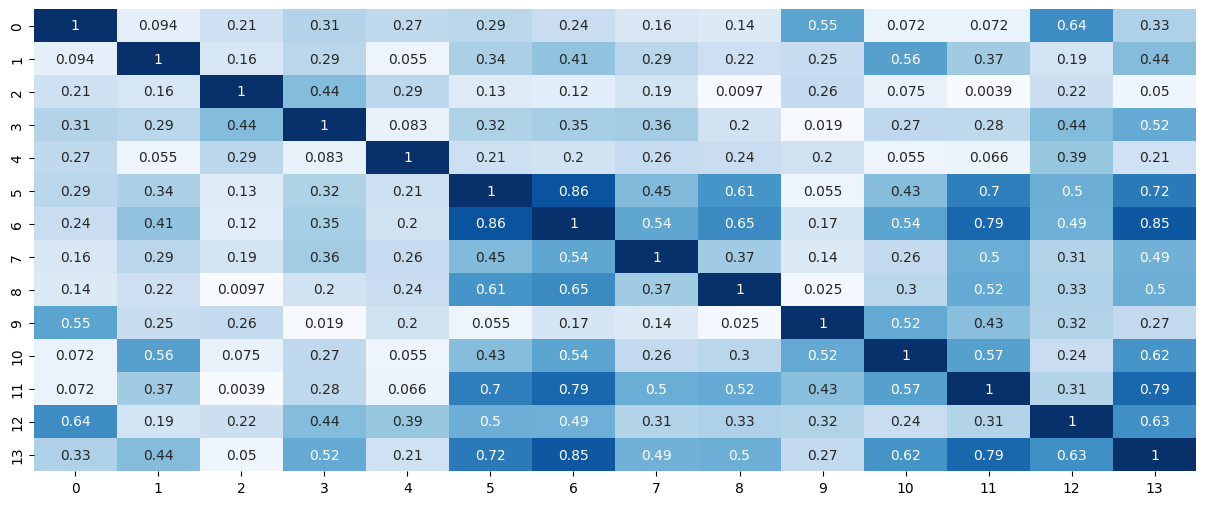

In [6]:
fig, ax = plt.subplots()

sns.heatmap(data_df.corr().abs(), ax = ax, cmap='Blues', annot= True, fmt='.2g', cbar=False);

In [7]:
labels = data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis=1)
features_df.shape, labels.shape

((178, 13), (178,))

Make the model clean and never let out model asume anything on its own. So its always a good option to do encoding. Here we do label encoding.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=TEST_SIZE, stratify=labels, random_state=RANDOM_STATE)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### MODEL

13-8-3

This model takes the input as a list.

In [10]:
# Sequential Model
# another way to define the model is:

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1], )))    # Input layer
model.add(tf.keras.layers.Dense(13, activation='relu')) # first hidden layer
model.add(tf.keras.layers.Dense(8, activation='relu')) # second hidden layer
# model.add(tf.keras.layers.Dense(15, activation='relu')) # third hidden layer
# model.add(tf.keras.layers.Dense(9, activation='relu')) # forth hidden layer
model.add(tf.keras.layers.Dense(3))            # Output Layer

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# model = tf.keras.Sequential( [
#     tf.keras.Input(shape=(X_train.shape[1], )),
#     tf.keras.layers.Dense(27, activation='relu'), # first hidden layer
#     tf.keras.layers.Dense(21, activation='relu'), # second hidden layer
#     tf.keras.layers.Dense(15, activation='relu'), # third hidden layer
#     tf.keras.layers.Dense(9, activation='relu'), # forth hidden layer
#     tf.keras.layers.Dense(4)            # Output Layer
# ])

Alternate way to do the above by defining it in different way instead of giving it in the model signatre itself.

In [13]:
# Functional Model or the Functional API of the Model

# inputs = tf.keras.Input(shape = (X_train.shape[1], ))

# x = tf.keras.layers.Dense(27, activation='relu') (inputs)
# x = tf.keras.layers.Dense(21, activation='relu') (x)
# x = tf.keras.layers.Dense(15, activation='relu') (x)
# x = tf.keras.layers.Dense(9, activation='relu') (x)

# outputs = tf.keras.layers.Dense(4) (x)

# model1 = tf.keras.Model(inputs=inputs, outputs = outputs)

# model1.summary()

In [14]:
X_train[:1].shape

(1, 13)

Because we have 4 nodes in the last layer or the output layer, we get 4 values as the output.

In [15]:
pred = model(X_train[:1]).numpy()
pred

array([[ 0.26700604, -0.45292735,  0.51304567]], dtype=float32)

In [16]:
tf.nn.softmax(pred).numpy().sum()

np.float32(1.0)

In [17]:
import sys
np.log(sys.float_info.max)

np.float64(709.782712893384)

since the maximum value the model can take is 709 hence we can't take more than 709 value in the neural network.

In [18]:
# Loss Function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7372398376464844>

In [19]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

In [20]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs = EPOCHS)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.2800 - loss: 1.3008 - val_accuracy: 0.2222 - val_loss: 1.1597
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3050 - loss: 1.2333 - val_accuracy: 0.2500 - val_loss: 1.1129
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3026 - loss: 1.1735 - val_accuracy: 0.3056 - val_loss: 1.0702
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3641 - loss: 1.1187 - val_accuracy: 0.3889 - val_loss: 1.0358
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.3997 - loss: 1.0701 - val_accuracy: 0.4167 - val_loss: 1.0045
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.4510 - loss: 1.0284 - val_accuracy: 0.4722 - val_loss: 0.9758
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4721 - loss: 0.9910 - val_accuracy: 0.5000 - val_loss: 0.9491
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5291 - loss: 0.9571 - val_accuracy: 0.5278 - val_l

In [22]:
model.evaluate(X_train , y_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0344 


[0.029697103425860405, 1.0]

In [23]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9711 - loss: 0.0696


[0.0671071857213974, 0.9722222089767456]

In [24]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.260563,1.288102,0.222222,1.159725
1,0.288732,1.220601,0.250000,1.112930
2,0.295775,1.159867,0.305556,1.070165
3,0.359155,1.104725,0.388889,1.035800
4,0.394366,1.055748,0.416667,1.004500


<Axes: xlabel='Epochs', ylabel='Accuracy'>

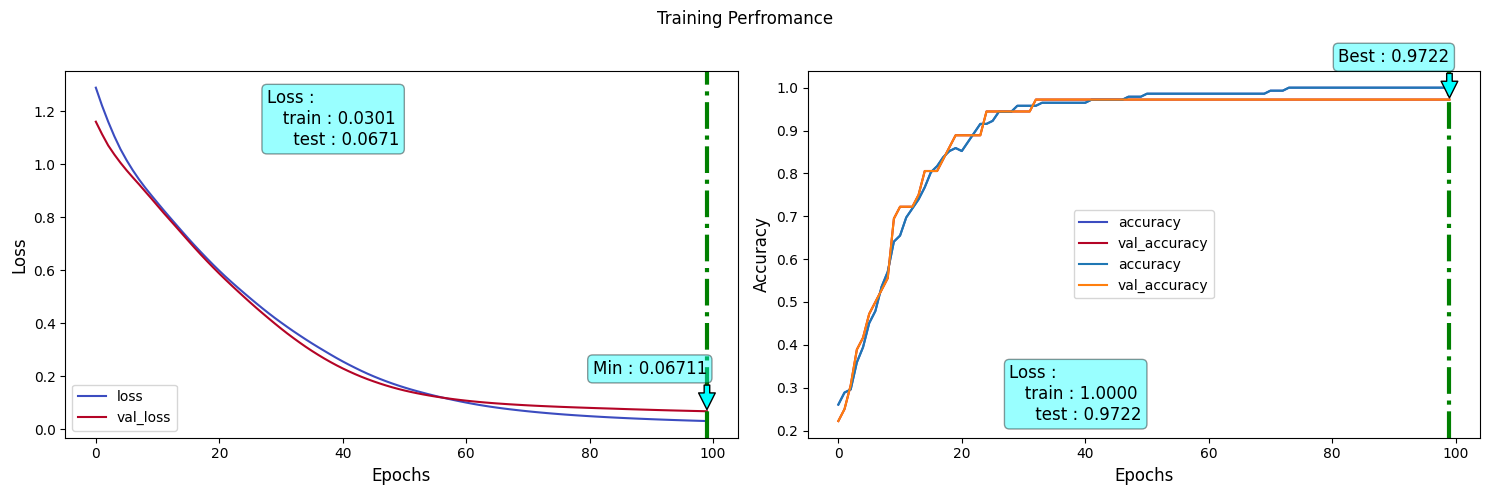

In [25]:
hist_df = loss_df.copy()

fig, axes = plt.subplots(1,2, figsize=(15,5))

y1 = loss_df.columns[0]
y2 = loss_df.columns[1]
y3 = loss_df.columns[2]
y4 = loss_df.columns[3]

best = hist_df[hist_df[y4] == hist_df[y4].min()]
props = dict(boxstyle = 'round', facecolor = 'aqua', alpha = 0.4)
facecolor = 'cyan'
fontsize = 12
CMAP = plt.cm.coolwarm


ax = axes[0]
hist_df.plot(y=[y2,y4], ax=ax, colormap = CMAP)
txtFmt = 'Loss : \n   train : {:6.4f}\n     test : {:6.4f}'
txtstr = txtFmt.format(hist_df.iloc[-1][y2], hist_df.iloc[-1][y4])


ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize, verticalalignment='top', bbox = props)

# Offset for the Arrows
y_min = min(hist_df[y2].min(), hist_df[y4].min())
y_max = max(hist_df[y2].max(), hist_df[y4].max())
offset = (y_max - y_min)/10.0

ax.annotate(f'Min : {best[y4].to_numpy()[0]:6.4}',    # text to print
            xy = (best.index.to_numpy(), best[y4].to_numpy()[0]),  # start
            xytext = (best.index.to_numpy(), best[y4].to_numpy()[0] + offset),
            fontsize = fontsize, va='bottom', ha = 'right', bbox= props,
            arrowprops = dict(facecolor = facecolor, shrink = 0.05))

ax.axvline(best.index.to_numpy()[0], color = 'g', linestyle = '-.', lw = 3)
ax.set_xlabel('Epochs')
ax.set_ylabel(y2.capitalize())


ax = axes[1]
hist_df.plot(y=[y1,y3], ax=ax, colormap = CMAP)
txtFmt = 'Loss : \n   train : {:6.4f}\n     test : {:6.4f}'
txtstr = txtFmt.format(hist_df.iloc[-1][y1], hist_df.iloc[-1][y3])

ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize, verticalalignment='top', bbox = props)

# Offset for the Arrows
y_min = min(hist_df[y1].min(), hist_df[y3].min())
y_max = max(hist_df[y1].max(), hist_df[y3].max())
offset = (y_max - y_min)/10.0

ax.annotate(f'Best : {best[y3].to_numpy()[0]:6.4}',    # text to print
            xy = (best.index.to_numpy(), best[y3].to_numpy()[0]),  # start
            xytext = (best.index.to_numpy(), best[y3].to_numpy()[0] + offset),
            fontsize = fontsize, va='bottom', ha = 'right', bbox= props,
            arrowprops = dict(facecolor = facecolor, shrink = 0.05))

ax.axvline(best.index.to_numpy(), color = 'g', linestyle = '-.', lw = 3)
ax.set_xlabel('Epochs')
ax.set_ylabel(y1.capitalize())

ax.grid()
plt.suptitle('Training Perfromance')
plt.tight_layout()
ax = axes[1]
# hist_df.plot(y=[y2,y4], ax=axes[0])
hist_df.plot(y=[y1,y3], ax=ax)

In [26]:
best

,accuracy,loss,val_accuracy,val_loss
99,1.0,0.030143,0.972222,0.067107


Train Predictions

In [27]:
pred_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

y_pred = pred_model(X_train).numpy()

print(f'Accuracy :{accuracy_score(y_train, y_pred.argmax(axis=1)):7.4f}')

Accuracy : 1.0000


In [28]:
print(classification_report(y_train, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



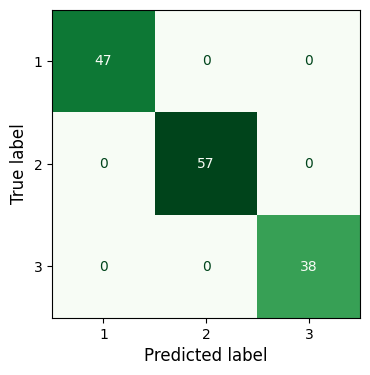

In [29]:
display_labels = [1,2,3]

cm = confusion_matrix(y_train, y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= display_labels)

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Greens', colorbar=False)